<a href="https://colab.research.google.com/github/drsandhu26/drsandhu26/blob/main/Breast_Cancer_Logistic_Regression_and_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

df=pd.read_csv('/content/data.csv')



In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [14]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


<Axes: xlabel='diagnosis', ylabel='count'>

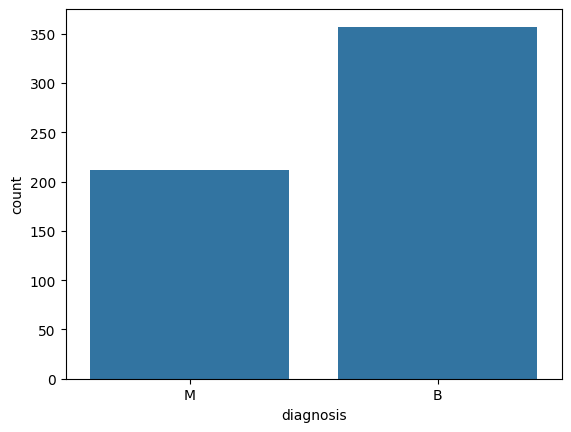

In [15]:
sns.countplot(x='diagnosis',data=df)

<Axes: xlabel='diagnosis', ylabel='count'>

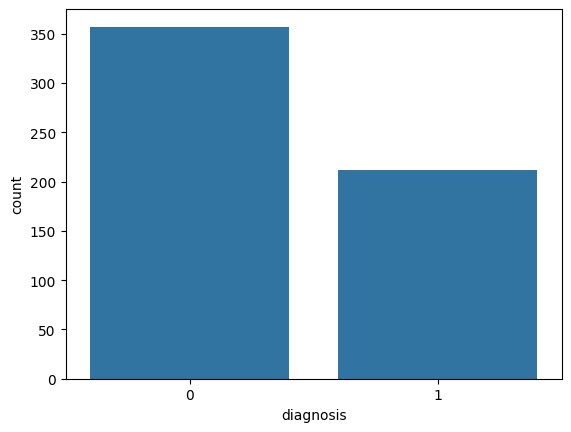

In [18]:
# prompt: convert diagnosis from string to 0,1

df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
df.head()
sns.countplot(x='diagnosis',data=df)

<Axes: >

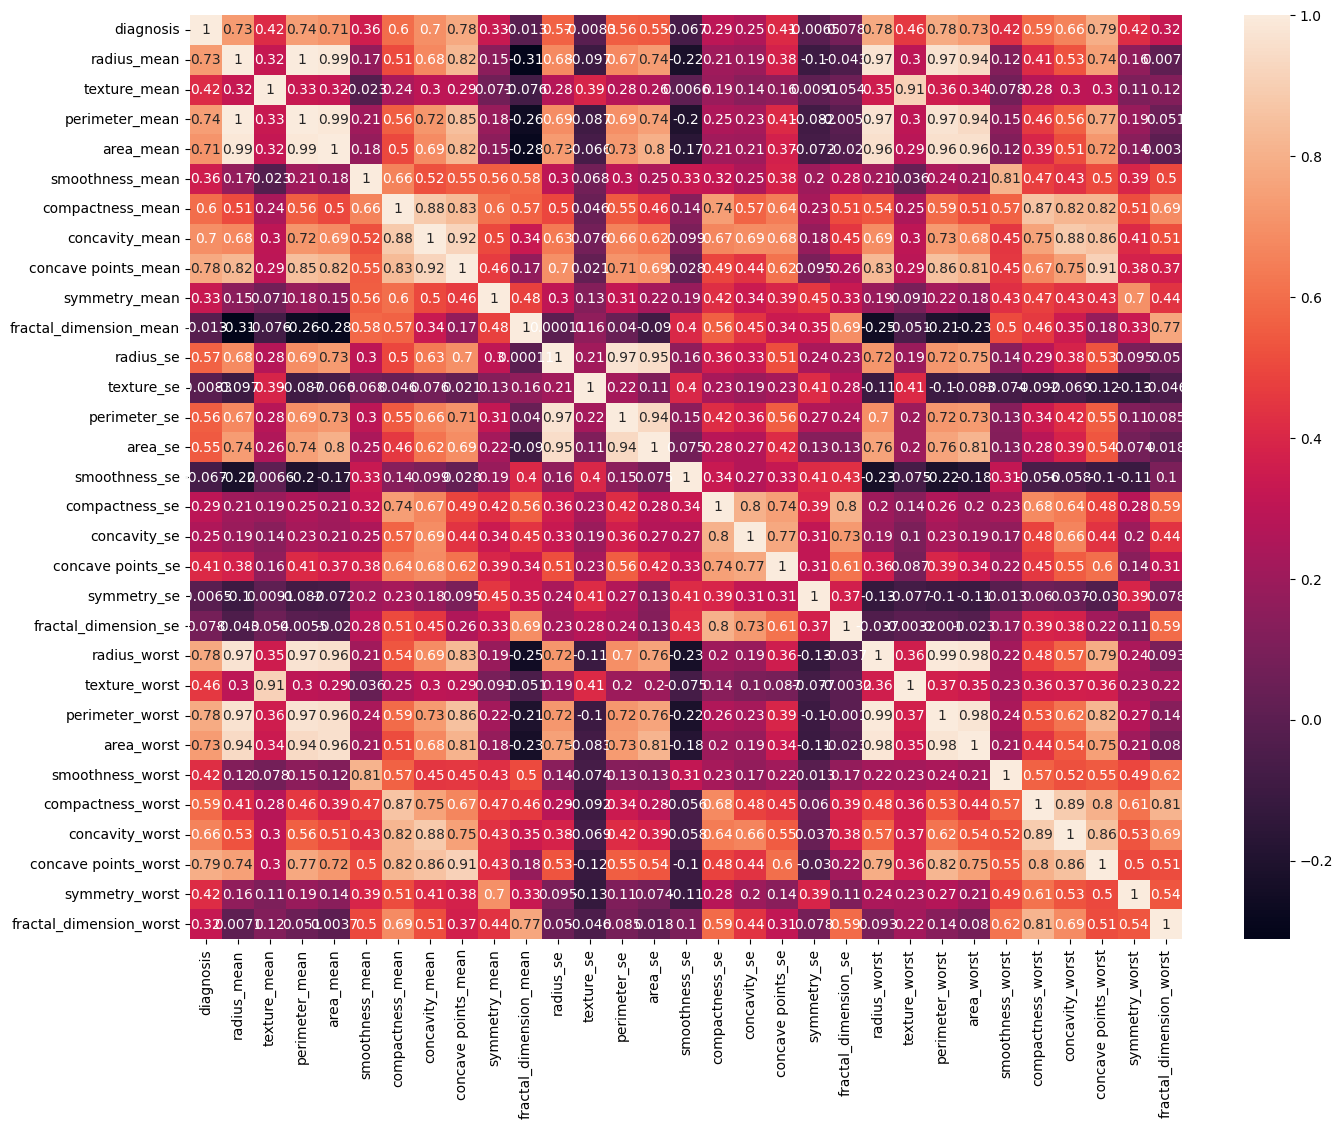

In [21]:
df_numeric = df.drop(['id', 'Unnamed: 32'], axis=1)
plt.figure(figsize=(16, 12)) # Set the figure size
sns.heatmap(df_numeric.corr(),annot=True)

In [22]:
x_train, x_test, y_train, y_test = train_test_split(df_numeric.drop('diagnosis', axis=1), df_numeric['diagnosis'], test_size=0.2, random_state=42)

In [23]:
logregression=LogisticRegression()
logregression.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
Matrix=confusion_matrix(y_test,logregression.predict(x_test))
print(Matrix)

[[70  1]
 [ 4 39]]


In [25]:
accuracy_score=logregression.score(x_test,y_test)
print(accuracy_score)

0.956140350877193


Feature: 0, Score: -1.22391
Feature: 1, Score: -0.29981
Feature: 2, Score: -0.20002
Feature: 3, Score: 0.01626
Feature: 4, Score: 0.04597
Feature: 5, Score: 0.22044
Feature: 6, Score: 0.30518
Feature: 7, Score: 0.13082
Feature: 8, Score: 0.06879
Feature: 9, Score: 0.01380
Feature: 10, Score: -0.04032
Feature: 11, Score: -0.55098
Feature: 12, Score: -0.02864
Feature: 13, Score: 0.06658
Feature: 14, Score: 0.00435
Feature: 15, Score: 0.04466
Feature: 16, Score: 0.06190
Feature: 17, Score: 0.01682
Feature: 18, Score: 0.01629
Feature: 19, Score: 0.00387
Feature: 20, Score: -1.27558
Feature: 21, Score: 0.48145
Feature: 22, Score: 0.21568
Feature: 23, Score: 0.01744
Feature: 24, Score: 0.08201
Feature: 25, Score: 0.66613
Feature: 26, Score: 0.82359
Feature: 27, Score: 0.24181
Feature: 28, Score: 0.22374
Feature: 29, Score: 0.06177


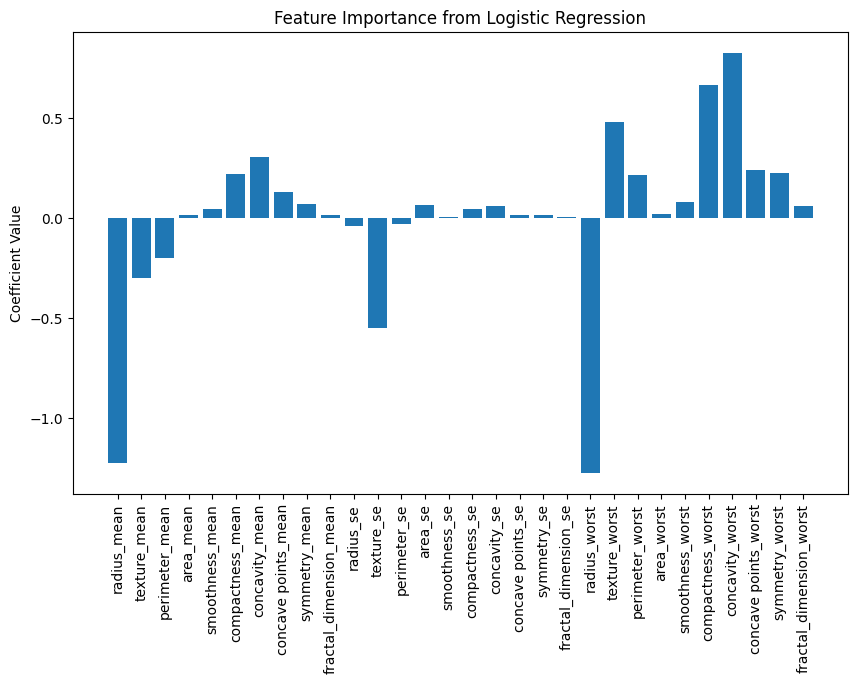

In [26]:
# prompt: write code for feature importance

# Feature Importance
importance = logregression.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.figure(figsize=(10, 6))
plt.bar([x for x in range(len(importance))], importance)
plt.xticks(range(len(importance)), x_train.columns, rotation=90)
plt.title('Feature Importance from Logistic Regression')
plt.ylabel('Coefficient Value')
plt.show()

In [33]:
# prompt: WRITE CODE TO predict outcome using an array of values

# Assuming `new_data_point` is a NumPy array or pandas DataFrame containing the features for prediction
# Make sure the order of features in `new_data_point` matches the order used for training

# Example: If you have a single data point as a list of values:
new_data_point_list = [
    13.47, 14.06, 87.32, 546.3, 0.1071, 0.1155, 0.05786, 0.05266, 0.1779, 0.06639,
    0.1588, 0.5733, 1.102, 12.84, 0.00445, 0.01452, 0.01334, 0.008791, 0.01698, 0.002787,
    14.83, 18.32, 94.94, 660.2, 0.1393, 0.2499, 0.1848, 0.1335, 0.3227, 0.09326
]


new_data_point = np.array(new_data_point_list).reshape(1, -1) # Reshape for a single sample

# Predict the outcome using the trained logistic regression model
prediction = logregression.predict(new_data_point)

# The prediction will be a NumPy array. Access the first element for the predicted class.
predicted_class = prediction[0]

# Print the prediction
if predicted_class == 1:
  print("Predicted diagnosis: Malignant (1)")
else:
  print("Predicted diagnosis: Benign (0)")

# You can also get the probability of each class
prediction_proba = logregression.predict_proba(new_data_point)
print(f"Probability of Benign (0): {prediction_proba[0][0]:.4f}")
print(f"Probability of Malignant (1): {prediction_proba[0][1]:.4f}")


Predicted diagnosis: Benign (0)
Probability of Benign (0): 0.9987
Probability of Malignant (1): 0.0013


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
